# Colab 환경에서 작성됨

구글 드라이브의 py 코드를 이용하기 위해  
Colab에 구글 드라이브를 마운트 한다.

다른 환경에서는 grid_visualization.py, temporal_difference.py가 있으면 된다.

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/py
!pwd
!ls

Mounted at /content/drive
/content/drive/MyDrive/py
/content/drive/MyDrive/py
grid_visualization.py  gridworld.py  __pycache__  temporal_difference.py


# 교재의 GridWorld 예제
SARSA 알고리즘  
GridWorld의 1번 state와 마지막 state가 종료 상태이다.

## Import module

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from gridworld import GridworldEnv
from temporal_difference import SARSA
from grid_visualization import visualize_value_function, visualize_policy

GridWolrd 초기화하기
가로로 nx개, 세로로 ny 개의 칸을 가진 GridworldEnv를 만든다.

In [4]:
nx, ny = 4, 4
env = GridworldEnv([ny, nx])

# SARSA 에이전트 초기화하기

gamma: 할인율  
num_states: 상태공간의 크기 (서로 다른 상태의 갯수)  
num_actions: 행동공간의 크기 (서로 다른 행동의 갯수)  
epsilon: image.png-탐욕적 정책의 파라미터  
lr: 학습률  

In [5]:
sarsa_agent = SARSA(gamma=1.0, lr=1e-1, num_states=env.nS, num_actions=env.nA, epsilon=1.0)

## SARSA 업데이트
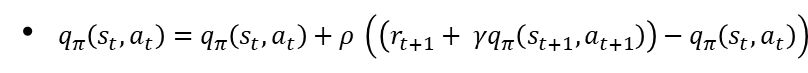

sarsa_agent 내부에서 이 알고리즘 수행

In [8]:
# 에피소드의 수
num_eps = 10000

# report 주기 --> 매 1000개의 episode
report_every = 1000

# 결과를 저장할 리스트
sarsa_qs = []
iter_idx = []
sarsa_rewards = []

for i in range(num_eps):
  reward_sum = 0
  env.reset()
  while True:
    # 현재 상태 가져오기
    state = env.s

    # sarsa 알고리즘이 동작하는 sarsa_agent에서 행동 하나 가져오기
    action = sarsa_agent.get_action(state)

    # 받아온 행동 하기
    next_state, reward, done, info = env.step(action)

    # 다음 행동을 sarsa_agent에서 행동 하나 가져오기
    next_action = sarsa_agent.get_action(next_state)

    # Q 상태, 행동 가치함수 업데이트 하기
    sarsa_agent.update_sample(state=state, 
                              action=action, 
                              reward=reward, 
                              next_state=next_state, 
                              next_action=next_action, 
                              done=done)
    
    # 보상 누적하기
    reward_sum += reward

    # agent가 종료 상태에 도달했다면 에피소드 종료 후 다음 에피소드로
    if done:
      break
  
  # 보상 기록 후 log 출력
  sarsa_rewards.append(reward_sum)

  if i % report_every == 0:
    print("Running {} th episode".format(i))
    print("Reward_sum : {}".format(reward_sum))
    sarsa_qs.append(sarsa_agent.q.copy())
    iter_idx.append(i)

Running 0 th episode
Reward_sum : -5.0
Running 1000 th episode
Reward_sum : -23.0
Running 2000 th episode
Reward_sum : -3.0
Running 3000 th episode
Reward_sum : -27.0
Running 4000 th episode
Reward_sum : 0.0
Running 5000 th episode
Reward_sum : -4.0
Running 6000 th episode
Reward_sum : -53.0
Running 7000 th episode
Reward_sum : -15.0
Running 8000 th episode
Reward_sum : -7.0
Running 9000 th episode
Reward_sum : -84.0


# 그래픽 출력

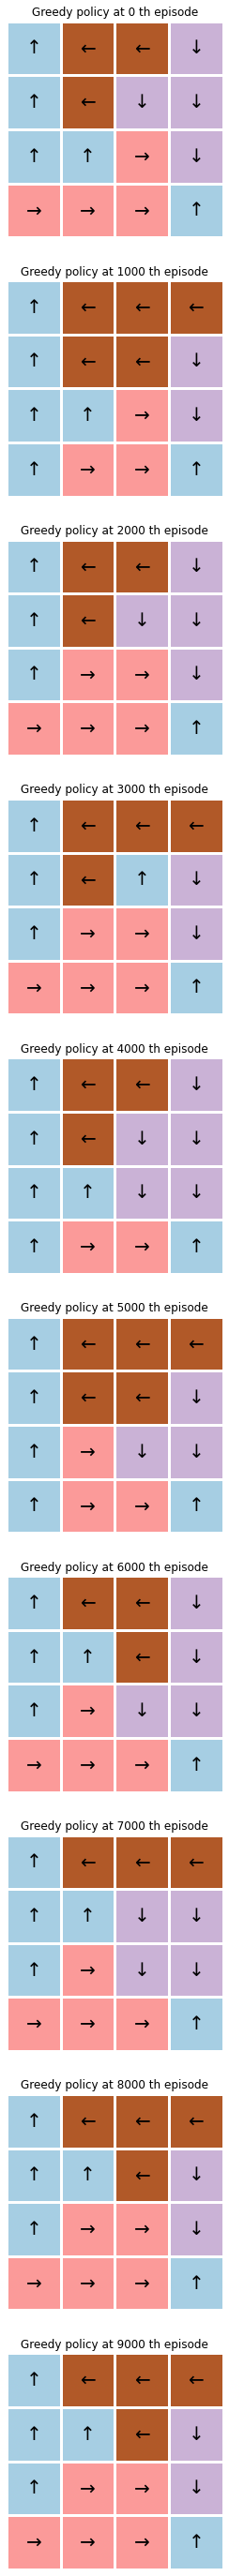

In [9]:
num_plots = len(sarsa_qs)
fig, ax = plt.subplots(num_plots, figsize=(num_plots*5*5, num_plots*5))
for i, (q, viz_i) in enumerate(zip(sarsa_qs, iter_idx)):
    visualize_policy(ax[i], q, env.shape[0], env.shape[1])
    _ = ax[i].set_title("Greedy policy at {} th episode".format(viz_i))